   buying_b'high'  buying_b'low'  buying_b'med'  buying_b'vhigh'  \
0           False          False          False             True   
1           False          False          False             True   
2           False          False          False             True   
3           False          False          False             True   
4           False          False          False             True   

   maint_b'high'  maint_b'low'  maint_b'med'  maint_b'vhigh'  doors_b'2'  \
0          False         False         False            True        True   
1          False         False         False            True        True   
2          False         False         False            True        True   
3          False         False         False            True        True   
4          False         False         False            True        True   

   doors_b'3'  ...  doors_b'5more'  persons_b'2'  persons_b'4'  \
0       False  ...           False          True         False   
1 

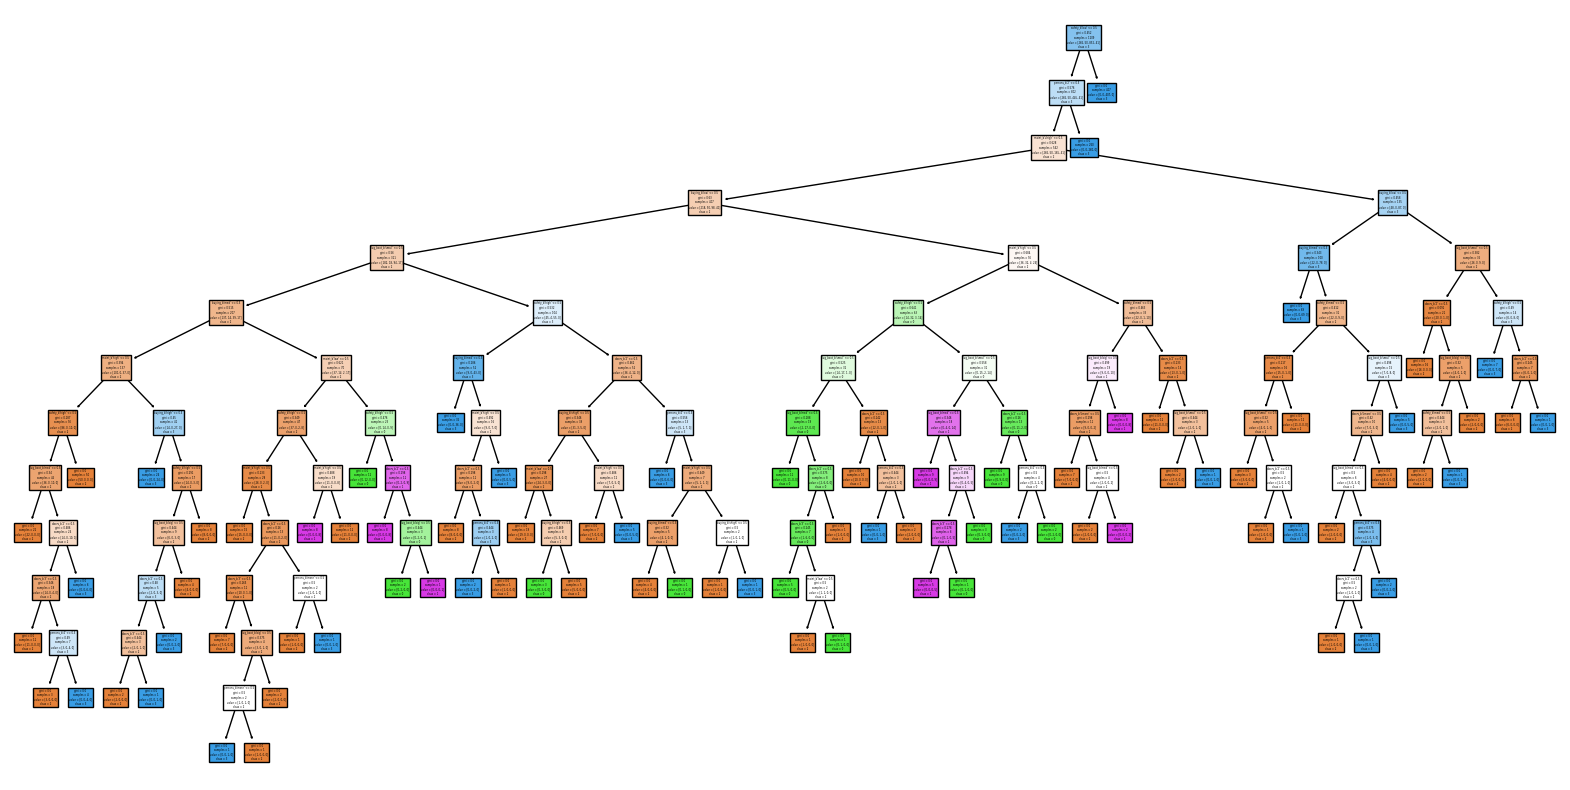

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....criterion=gini, max_depth=None;, score=0.950 total time=   0.0s
[CV 2/5] END ....criterion=gini, max_depth=None;, score=0.959 total time=   0.0s
[CV 3/5] END ....criterion=gini, max_depth=None;, score=0.967 total time=   0.0s
[CV 4/5] END ....criterion=gini, max_depth=None;, score=0.967 total time=   0.0s
[CV 5/5] END ....criterion=gini, max_depth=None;, score=0.975 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.959 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.938 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.979 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.967 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.967 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=20;, score=0.950 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=20;

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.io import arff
from sklearn.preprocessing import OneHotEncoder

# Step 2: Load ARFF File
data, meta = arff.loadarff('/content/dataset_21_car.arff')
df = pd.DataFrame(data)

# Convert class column to numerical labels
df['class'] = df['class'].astype('category').cat.codes

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

# Separate features and target
X = df.drop(columns=['class'])
y = df['class']

# Step 3: Exploratory Data Analysis
print(X.head())
print(X.describe())
print(X.isnull().sum())

# Step 4: Train/Test Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train the Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Step 6: Predict and Analyze Model Performance
dt_predictions = dt_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=df['class'].unique().astype(str))
plt.show()

# Step 7: Improve Accuracy with GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator:", grid.best_estimator_)

# Predict using the best estimator
grid_predictions = grid.predict(X_test)

print("Classification Report after GridSearchCV:")
print(classification_report(y_test, grid_predictions))
print("Confusion Matrix after GridSearchCV:")
print(confusion_matrix(y_test, grid_predictions))